In [5]:
import sys
sys.path.insert(1,"../src")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as tfk
tfkl = tf.keras.layers
import GA_util
import util
import seaborn as sns
import nupack as n
import time

In [2]:
gene = 'ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGTGGACCCTCAGATTCAACTGGCAGTAACCAGAATGGAGAACGCAGTGGGGCGCGATCAAAACAACGTCGGCCCCAAGGTTTACCCAATAATACTGCGTCTTGGTTCACCGCTCTCACTCAACATGGCAAGGAAGACCTTAAATTCCCTCGAGGACAAGGCGTTCCAATTAACACCAATAGCAGTCCAGATGACCAAATTGGCTACTACCGAAGAGCTACCAGACGAATTCGTGGTGGTGACGGTAAAATGAAAGATCTCAGTCCAAGATGGTATTTCTACTACCTAGGAACTGGGCCAGAAGCTGGACTTCCCTATGGTGCTAACAAAGACGGCATCATATGGGTTGCAACTGAGGGAGCCTTGAATACACCAAAAGATCACATTGGCACCCGCAATCCTGCTAACAATGCTGCAATCGTGCTACAACTTCCTCAAGGAACAACATTGCCAAAAGGCTTCTACGCAGAAGGGAGCAGAGGCGGCAGTCAAGCCTCTTCTCGTTCCTCATCACGTAGTCGCAACAGTTCAAGAAATTCAACTCCAGGCAGCAGTAGGGGAACTTCTCCTGCTAGAATGGCTGGCAATGGCGGTGATGCTGCTCTTGCTTTGCTGCTGCTTGACAGATTGAACCAGCTTGAGAGCAAAATGTCTGGTAAAGGCCAACAACAACAAGGCCAAACTGTCACTAAGAAATCTGCTGCTGAGGCTTCTAAGAAGCCTCGGCAAAAACGTACTGCCACTAAAGCATACAATGTAACACAAGCTTTCGGCAGACGTGGTCCAGAACAAACCCAAGGAAATTTTGGGGACCAGGAACTAATCAGACAAGGAACTGATTACAAACATTGGCCGCAAATTGCACAATTTGCCCCCAGCGCTTCAGCGTTCTTCGGAATGTCGCGCATTGGCATGGAAGTCACACCTTCGGGAACGTGGTTGACCTACACAGGTGCCATCAAATTGGATGACAAAGATCCAAATTTCAAAGATCAAGTCATTTTGCTGAATAAGCATATTGACGCATACAAAACATTCCCACCAACAGAGCCTAAAAAGGACAAAAAGAAGAAGGCTGATGAAACTCAAGCCTTACCGCAGAGACAGAAGAAACAGCAAACTGTGACTCTTCTTCCTGCTGCAGATTTGGATGATTTCTCCAAACAATTGCAACAATCCATGAGCAGTGCTGACTCAACTCAGGCCTAA'

In [3]:
LEN = 30
tile_save = []

for i in range(len(gene) - LEN):
    
    tile = gene[i:i+LEN]
    
    tile_save.append(tile)

In [4]:
print(len(tile_save))

1230


In [6]:
switch_lst = []
core = 'GUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCC'
core = core.replace("U",'T')
promoter = 'GCGCTAATACGACTCACTATAGGG'

RBS = 'AACAGAGGAGA'
start = 'ATG'
# ['switch','loop2','stem1','atg','stem2']
for i in range(len(tile_save)):
    print('Trigger ',tile_save[i])
    
    trigger = tile_save[i]
    
    full_seq = ''
    
    switch = GA_util.revcompstr(tile_save[i])
    print(switch)
    print(len(switch))



    # print(toehold_sections['switch'])
    toehold_binding_region = switch[:12]
    
    # print(toehold_binding_region)
    # print(len(toehold_binding_region))

    b_region = switch[12:19]
    print(toehold_binding_region)
    print(b_region)
    # print(toehold_sections['switch'])

    # print(' '*12 + b_region)
    # print(len(b_region))
    b_star = GA_util.revcompstr(b_region)
    
    print(b_region + core + b_star)

    # full_aptaswitch = toehold_sections['switch']

    full_seq = promoter + switch + RBS + trigger[:6] + start + trigger[9:18] + core + b_region + 'AA'
    switch_lst.append(full_seq)
    # seq_lst.append(full_seq)
    print('Switch: ',full_seq)
    print(len(full_seq))
    print('\n')

Trigger  ATGTCTGATAATGGACCCCAAAATCAGCGA
input must not contain "U" bases
TCGCTGATTTTGGGGTCCATTATCAGACAT
30
TCGCTGATTTTG
GGGTCCA
input must not contain "U" bases
GGGTCCAGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCTGGACCC
Switch:  GCGCTAATACGACTCACTATAGGGTCGCTGATTTTGGGGTCCATTATCAGACATAACAGAGGAGAATGTCTATGAATGGACCCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGGGTCCAAA
137


Trigger  TGTCTGATAATGGACCCCAAAATCAGCGAA
input must not contain "U" bases
TTCGCTGATTTTGGGGTCCATTATCAGACA
30
TTCGCTGATTTT
GGGGTCC
input must not contain "U" bases
GGGGTCCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGGACCCC
Switch:  GCGCTAATACGACTCACTATAGGGTTCGCTGATTTTGGGGTCCATTATCAGACAAACAGAGGAGATGTCTGATGATGGACCCCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGGGGTCCAA
137


Trigger  GTCTGATAATGGACCCCAAAATCAGCGAAA
input must not contain "U" bases
TTTCGCTGATTTTGGGGTCCATTATCAGAC
30
TTTCGCTGATTT
TGGGGTC
input must not contain "U" bases
TGGGGTCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGACCCCA
Switch:  GCGCTAATACGACTCACTATAG

In [7]:
target_struc_switch = '........................' + '............' + '(((((((((' + '...' + '((((((' + '...........' + '))))))' + '...' + ')))))))))' + '.......' + '.'*len(core) + '..'

In [8]:
target_struc_switch
len(target_struc_switch)

137

In [9]:
target_core_struct = '((((((((' + '..((.(.((.(((...((((((....))))))))).)).).))))))))))'


target_struc_complex = '((((((((((((((((((((((((((((((' + '+' + '.'*len(promoter) + '))))))))))))))))))))))))))))))' + '.'*22 + target_core_struct + '..'
print(target_struc_complex)

print(target_struc_complex)

target_struc_trigger = '.'*30

((((((((((((((((((((((((((((((+........................))))))))))))))))))))))))))))))......................((((((((..((.(.((.(((...((((((....))))))))).)).).))))))))))..
((((((((((((((((((((((((((((((+........................))))))))))))))))))))))))))))))......................((((((((..((.(.((.(((...((((((....))))))))).)).).))))))))))..


In [49]:
#Writing NUPACK code to generate toehold switches
# prevented_sequences = ['A12','U12','C12','G12','S12','W12','K12','M12','R12','Y12']
# # prevented_sequences = ['A6','U6','C6','G6']

# pattern  = n.Pattern(prevented_sequences)



a = n.Domain('N12',name='a')
b_1 = n.Domain('N7',name='b_1') #first 7
b_2 = n.Domain('N2',name='b_2') #next two
b_3 = n.Domain('N3',name='b_3') #part opposite AUG
b_4 = n.Domain('N6',name='b_4') #Top of stem

RBS = n.Domain('AACAGAGGAGA',name='rbs')
# RBS= n.Domain('aacagaggaga',name='RBS')
AUG = n.Domain('AUG',name='start')
CORE =n.Domain(core,name='core')
PROMOTER = n.Domain(promoter,name='promoter')
AA = n.Domain('AA',name='aa')
# AUG = n.Domain('aug',name='start')

trigger_strand = n.TargetStrand([~b_4,~b_3,~b_2,~b_1,~a],name='trigger_strand')
toehold_strand = n.TargetStrand([PROMOTER,a,b_1,b_2,b_3,b_4,RBS,~b_4,AUG,~b_2,~b_1,CORE,b_1,AA],name='toehold_strand')


# bound_strand = n.TargetStrand([~b_4,~b_3,~b_2,~b_1,~a])

trigger_structure = 'U30'
# switch_structure = 'U12 D9 (U3 D6 (U11) U3)'

# switch_trigger_structure = 'D30 (U29 +)'




trigger_complex = n.TargetComplex([trigger_strand],trigger_structure,name='trigger_complex')
toehold_complex = n.TargetComplex([toehold_strand],target_struc_switch,name='toehold_complex')    
switch_trigger_complex = n.TargetComplex([trigger_strand,toehold_strand],target_struc_complex,name='switch_trigger_complex')



# t1 = n.TargetTube(on_targets={switch_trigger_complex:1e-8},name='tube1')
t1 = n.TargetTube(on_targets={toehold_complex:1e-8},name='tube1')
        
my_model = n.Model()
my_tubes = [t1]

weights = n.Weights(my_tubes)
weights[CORE] = 0
weights[AA] = 0
weights[PROMOTER] = 0
design = n.tube_design(tubes = my_tubes, hard_constraints=[], soft_constraints=[],defect_weights=weights, model = my_model)

In [50]:
result = design.run(500)

In [51]:
result = design.run(500)
free_nupack_seq = []
free_nupack_def = []



for i in range(500):
    free_nupack_seq.append(str(result[i][0]['toehold_complex']))
    free_nupack_def.append(result[i].ensemble_defect)

In [52]:
paired = zip(free_nupack_seq,free_nupack_def)

sorted_pairs = sorted(paired,key=lambda x :x[1])

sorted_seqs,sorted_defs = zip(*sorted_pairs)

In [53]:
sorted_triggers = [GA_util.revcompstr(i[len(promoter):len(promoter)+30]) for i in sorted_seqs]

print(sorted_triggers[:6])

input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must not contain "U" bases
input must

In [54]:
print(sorted_triggers[:6])

['GTACGCGGCATATTTCTCTATTCTTTGATA', 'CGCGCCGGCAGACCTCTCTTTGATGGCTTC', 'GTACGTGGTCTTTTCCCCTATTCTGTTATC', 'GTGACGGTTCGTACGAACTTTTATATTCTT', 'GTACGTTTTCTTTTTCCCTATTCTTTCATC', 'GTCCGGGGCATCTCCCCCTTTTATTTCTTT']


In [55]:
sorted_seqs[:6]

('GCGCUAAUACGACUCACUAUAGGGUAUCAAAGAAUAGAGAAAUAUGCCGCGUACAACAGAGGAGAGUACGCAUGAUAUUUCUCGUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCCGAGAAAUAA',
 'GCGCUAAUACGACUCACUAUAGGGGAAGCCAUCAAAGAGAGGUCUGCCGGCGCGAACAGAGGAGACGCGCCAUGAGACCUCUCGUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCCGAGAGGUAA',
 'GCGCUAAUACGACUCACUAUAGGGGAUAACAGAAUAGGGGAAAAGACCACGUACAACAGAGGAGAGUACGUAUGCUUUUCCCCGUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCCGGGGAAAAA',
 'GCGCUAAUACGACUCACUAUAGGGAAGAAUAUAAAAGUUCGUACGAACCGUCACAACAGAGGAGAGUGACGAUGCGUACGAACGUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCCGUUCGUAAA',
 'GCGCUAAUACGACUCACUAUAGGGGAUGAAAGAAUAGGGAAAAAGAAAACGUACAACAGAGGAGAGUACGUAUGCUUUUUCCCGUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCCGGGAAAAAA',
 'GCGCUAAUACGACUCACUAUAGGGAAAGAAAUAAAAGGGGGAGAUGCCCCGGACAACAGAGGAGAGUCCGGAUGAUCUCCCCCGUCGAGUAGAGUGUGGGCUCAGAUUCGUCUGAGACGGUCGGGUCCGGGGGAGAA')

In [56]:
import nupack as n
import time

time_start = time.time()

defect_save = []
for i in range(len(tile_save)):

    mod = n.Model()

    defect = n.defect(strands=[switch_lst[i]],structure=target_struc_switch,model=mod)
    
    defect_save.append(defect)
    
time_stop = time.time()


nupack_time = time_stop - time_start

<AxesSubplot: ylabel='Count'>

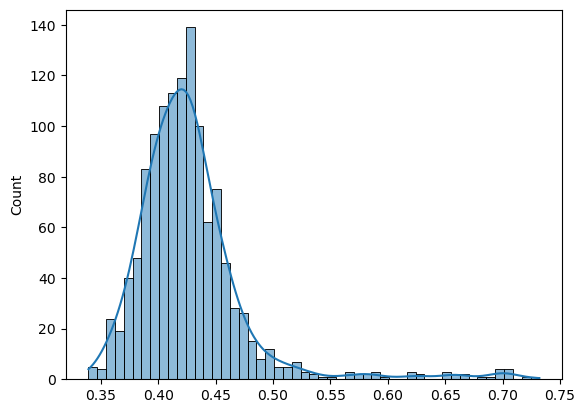

In [57]:
sns.histplot(defect_save,kde=True)

In [58]:
nupack_time

34.740468978881836

In [63]:
top_12_nupack_indices = sorted(range(len(defect_save)), key=lambda k: defect_save[k], reverse=False)

In [64]:
nupack_to_order_switches = []
nupack_to_order_triggers = []

for i in top_12_nupack_indices:
    print(defect_save[i])
    print(switch_lst[i])
    print(tile_save[i])
    print('\n')
    nupack_to_order_switches.append(switch_lst[i])
    nupack_to_order_triggers.append(tile_save[i])

0.33913810543288514
GCGCTAATACGACTCACTATAGGGAGGGAATTTAAGGTCTTCCTTGCCATGTTGAACAGAGGAGACAACATATGAAGGAAGACGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGTCTTCCAA
CAACATGGCAAGGAAGACCTTAAATTCCCT


0.34031914071438757
GCGCTAATACGACTCACTATAGGGATCATCCAAATCTGCAGCAGGAAGAAGAGTAACAGAGGAGAACTCTTATGCCTGCTGCAGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCTGCAGCAAA
ACTCTTCTTCCTGCTGCAGATTTGGATGAT


0.34229163957706743
GCGCTAATACGACTCACTATAGGGTCATCCAAATCTGCAGCAGGAAGAAGAGTCAACAGAGGAGAGACTCTATGTCCTGCTGCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGCAGCAGAA
GACTCTTCTTCCTGCTGCAGATTTGGATGA


0.34616119390803335
GCGCTAATACGACTCACTATAGGGAATCAGTTCCTTGTCTGATTAGTTCCTGGTAACAGAGGAGAACCAGGATGTAATCAGACGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGTCTGATAA
ACCAGGAACTAATCAGACAAGGAACTGATT


0.34650472022781426
GCGCTAATACGACTCACTATAGGGGGGTCCACCAAACGTAATGCGGGGTGCATTAACAGAGGAGAAATGCAATGCGCATTACGGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCCGTAATGAA
AATGCACCCCGCATTACGTTTGGTGGACCC


0.34857603899522055
GCGCTAATACGACTCACTATAGGGG

In [65]:
len(nupack_to_order_switches)

1230

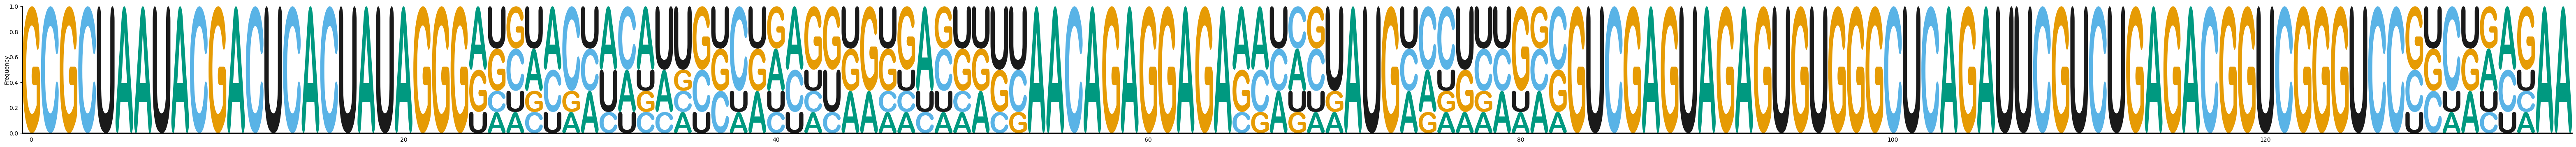

In [88]:
nupack_df = pd.DataFrame({'switch':nupack_to_order_switches[:6],'trigger':nupack_to_order_triggers[:6]})
nupack_free_df = pd.DataFrame({'switch':sorted_seqs[:12],'trigger':sorted_triggers[:12]})


nupack_df.to_csv('data/nupack_designs_4_25.csv')
nupack_free_df.to_csv('data/nupack_free_designs_4_25.csv')

util.plot_logo(util.one_hot_encode(nupack_df[['switch']]),figsize=[80,4])

In [71]:
#Start model predictions

labels = np.load('stat_tests/label_save_non_linear_on_off.npy',allow_pickle=True)

In [72]:
cluster_1_mods = [tfk.models.load_model('models/big_screen_non_linear_on_off_%s'%i) for i in range(100) if labels[i] == 'good']

Metal device set to: Apple M1 Ultra


2024-04-26 17:57:52.422137: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-26 17:57:52.422417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [73]:
model_indices = [i for i in range(100) if labels[i] == 'good']

In [74]:
seq_df = pd.DataFrame({'SWITCH':switch_lst})
# seq_df = pd.read_csv('data/processed_gardn_data_final.csv')

master_preds = np.zeros((seq_df.shape[0],100))




seqs = util.one_hot_encode(seq_df[['SWITCH']])
ppms = GA_util.create_ppms_fast(seqs)

In [75]:
preds_cluster_1_save = np.zeros((seqs.shape[0],len(cluster_1_mods)))
# preds_cluster_2_save = np.zeros((seqs.shape[0],len(cluster_2)))

model_time_start = time.time()
for i,mod in enumerate(cluster_1_mods):
    
    preds_tmp = mod.predict([seqs,ppms])[:,0]
    
    print(preds_tmp.shape)
    
    preds_cluster_1_save[:,i] = preds_tmp
    
model_time_stop = time.time()

14/39 [=========>....................] - ETA: 0s

2024-04-26 17:58:56.515208: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-26 17:58:56.559847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
30/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:56.921286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
31/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:57.213351: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
30/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:57.512019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
30/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:57.805101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
31/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:58.099037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
29/39 [=====================>........] - ETA: 0s

2024-04-26 17:58:58.410682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
31/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:58.706212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
31/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:58.993264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:58:59.293101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:58:59.620059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
30/39 [======================>.......] - ETA: 0s

2024-04-26 17:58:59.945636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
29/39 [=====================>........] - ETA: 0s

2024-04-26 17:59:00.262599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 4ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:00.569639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
30/39 [======================>.......] - ETA: 0s

2024-04-26 17:59:00.881387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
29/39 [=====================>........] - ETA: 0s

2024-04-26 17:59:01.197585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
29/39 [=====================>........] - ETA: 0s

2024-04-26 17:59:01.510876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
29/39 [=====================>........] - ETA: 0s

2024-04-26 17:59:01.820215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
26/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:02.128965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:02.461462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:02.803200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:03.135819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
29/39 [=====================>........] - ETA: 0s

2024-04-26 17:59:03.451000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:03.769987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:04.109475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
25/39 [==================>...........] - ETA: 0s

2024-04-26 17:59:04.449678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 6ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:04.837001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:05.187505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:05.532284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:05.868487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
26/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:06.217330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
26/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:06.567156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:06.902433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
26/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:07.261778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
26/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:07.630056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
28/39 [====================>.........] - ETA: 0s

2024-04-26 17:59:07.996058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)
27/39 [===================>..........] - ETA: 0s

2024-04-26 17:59:08.345188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


39/39 [==============================] - 0s 5ms/step
(1230,)


In [76]:
model_time_stop - model_time_start

12.176414966583252

In [77]:
preds_cluster_1_save.shape

(1230, 37)

In [78]:
preds_cluster_1 = np.mean(preds_cluster_1_save,axis=1)
# preds_cluster_2 = np.mean(preds_cluster_2_save,axis=1)

In [79]:
sorted_indices_1 = np.argsort(preds_cluster_1)

print(sorted_indices_1)

[1102  791  719 ...  196 1179  392]


In [80]:
print(preds_cluster_1[sorted_indices_1[-6:]])

[0.76231204 0.763026   0.76501337 0.76601169 0.76676    0.79902126]


In [81]:
sandstorm_switch_save = []
sandstorm_trigger_save = []

for i in range(6):
    
    lookup = sorted_indices_1[-(i+1)]
    
    # print(preds_cluster_1[sorted_indices_1[-6:]])
    
    
    sandstorm_switch_save.append(switch_lst[lookup])
    sandstorm_trigger_save.append(tile_save[lookup])

In [82]:
tmp = pd.DataFrame({'switch':sandstorm_switch_save,'trigger':sandstorm_trigger_save})
print(tmp.shape)

(6, 2)


In [83]:
low_switch_save = []
low_trigger_save = []

for i in range(6):
    
    lookup = sorted_indices_1[i]
    
    # print(preds_cluster_1[sorted_indices_1[-6:]])
    
    
    low_switch_save.append(switch_lst[lookup])
    low_trigger_save.append(tile_save[lookup])

In [84]:
tmp_2 = pd.DataFrame({'switch':low_switch_save,'trigger':low_trigger_save})
print(tmp.shape)

(6, 2)


In [85]:
tmp.to_csv('data/sandstorm_screen_non_linear_on_off_4_25.csv')
tmp_2.to_csv('data/sandstorm_screen_non_linear_on_off_low_4_25.csv')

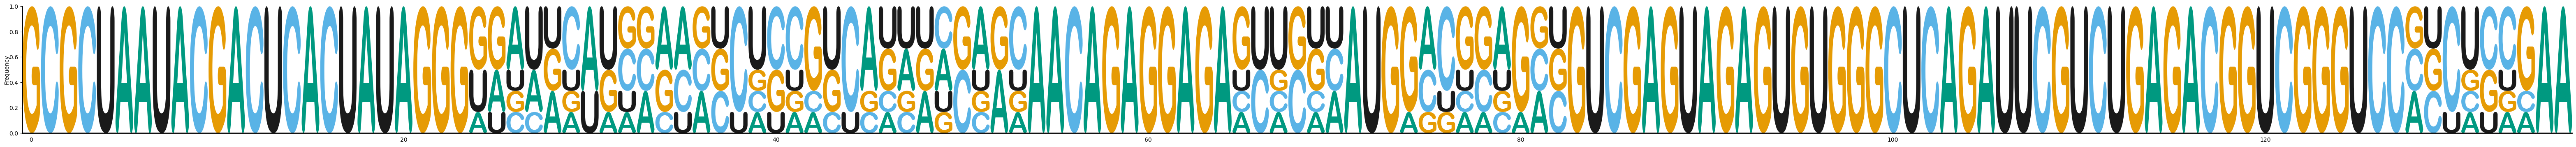

In [86]:
util.plot_logo(util.one_hot_encode(tmp[['switch']]),figsize=[80,4])

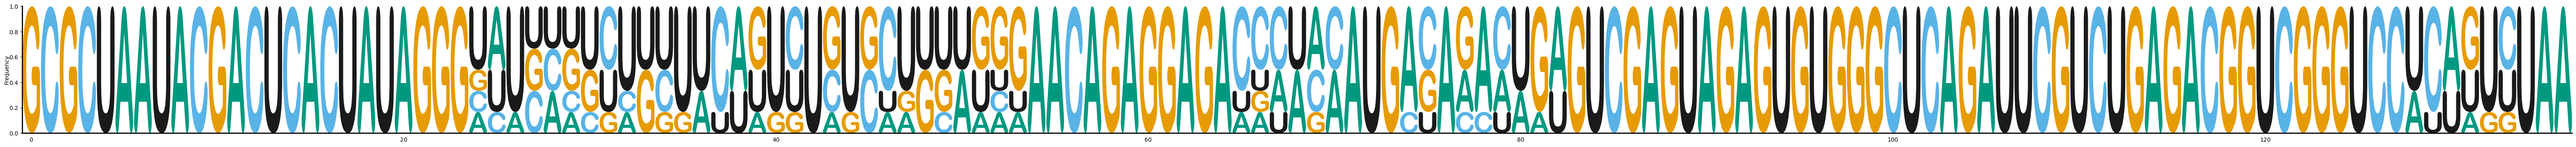

In [87]:
util.plot_logo(util.one_hot_encode(tmp_2[['switch']]),figsize=[80,4])

In [45]:
for switch,trigger in zip(sandstorm_switch_save,sandstorm_trigger_save):
    print(switch)
    print(len(switch))
    print(trigger)
    print('\n')

GCGCTAATACGACTCACTATAGGGGTATTCAAGGCTCCCTCAGTTGCAACCCATAACAGAGGAGAATGGGTATGAACTGAGGGGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCCCCTCAGAA
137
ATGGGTTGCAACTGAGGGAGCCTTGAATAC


GCGCTAATACGACTCACTATAGGGGAAATCATCCAAATCTGCAGCAGGAAGAAGAACAGAGGAGACTTCTTATGGCTGCAGATGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCATCTGCAAA
137
CTTCTTCCTGCTGCAGATTTGGATGATTTC


GCGCTAATACGACTCACTATAGGGTGTTAATTGGAACGCCTTGTCCTCGAGGGAAACAGAGGAGATCCCTCATGGACAAGGCGGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCCGCCTTGAA
137
TCCCTCGAGGACAAGGCGTTCCAATTAACA


GCGCTAATACGACTCACTATAGGGTGGTGTATTCAAGGCTCCCTCAGTTGCAACAACAGAGGAGAGTTGCAATGGAGGGAGCCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCGGCTCCCAA
137
GTTGCAACTGAGGGAGCCTTGAATACACCA


GCGCTAATACGACTCACTATAGGGAGCAAGAGCAGCATCACCGCCATTGCCAGCAACAGAGGAGAGCTGGCATGGGCGGTGATGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGGTCCATCACCGAA
137
GCTGGCAATGGCGGTGATGCTGCTCTTGCT


GCGCTAATACGACTCACTATAGGGGAACGCTGAAGCGCTGGGGGCAAATTGTGCAACAGAGGAGAGCACAAATGGCCCCCAGCGTCGAGTAGAGTGTGGGCTCAGATTCGTCTGAGACGGTCGGG